In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import beta

---
The Beta Distribution
=====
***

####1. Set a = 5, b = 10 and calculate the mean and variance of the resulting beta distribution. Now spend a couple of minutes altering the values for a and b and noting the change in mean and variance

####2. Generate 100 random values from your beta distribution (the one that you defined in 1. above)

####3. Now, on the same graph, plot a histogram of the random values, and a plot of the pdf

---
[A Bayesian view of Amazon Resellers](http://www.johndcook.com/blog/2011/09/27/bayesian-amazon/)
=====
***

####Three Amazon resellers offer a book at essentially the same price. Here are their ratings:
- 94% positive out of 85,193 reviews
- 98% positive out of 20,785 reviews
- 99% positive out of 840 reviews
####Which reseller is likely to give the best service?

#### A simpler example:

- Reseller A has 90 positive reviews out of 100 (90% positive)
- Reseller B has two reviews, both positive. (100% positive)

####Which is better?  (better = more trustworthy)

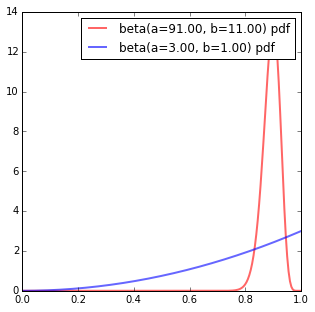

In [2]:
# Plot Beta Distribution of Beta(1,1) (the Prior)
# Plot Beta(1,1)
# Plot Beta(91,11)
# Plot Beta(3,1)
# what does pdf plot look like?
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(111)

xs = np.linspace(0, 1, 200)

resellerA_a = 90 + 1
resellerA_b = 10 + 1
resellerB_a = 2 + 1
resellerB_b = 0 + 1
pA = ax.plot(xs, beta.pdf(xs, resellerA_a, resellerA_b), 'r-', lw=2, alpha=0.6, 
             label='beta(a=%0.2f, b=%0.2f) pdf'%(resellerA_a, resellerA_b))
pB = ax.plot(xs, beta.pdf(xs, resellerB_a, resellerB_b), 'b-', lw=2, alpha=0.6, 
             label='beta(a=%0.2f, b=%0.2f) pdf'%(resellerB_a, resellerB_b))

ax.legend()

In [3]:
# What is the probability that a sample from resellerA is bigger than a sample from resellerB?
# We answer this with random sampling!
def percent_better(a1, b1, a2, b2, size):
    
    ra = beta.rvs(a1, b1, size=size)
    #print ra
    rb = beta.rvs(a2, b2, size=size)
    #print rb
    #This is just a count of the number of times ra exceeds rb
    #print (ra >= rb)
    return sum(ra >= rb) / float(size)

In [4]:
pb = percent_better(resellerA_a, resellerA_b, resellerB_a, resellerB_b, size=100000)
if pb > 0.5:
    print "Reseller A is better than Reseller B by {:0.2}%".format(pb)
else:
    print "Reseller B is better than Reseller A by {:0.2}%".format(pb)

Reseller A is better than Reseller B by 0.71%


####4. Now replicate this analysis for the original problem, including plotting the 3 distributions for each reseller, finding the means and variances for the distribution of each reseller, and determining which is 'best'
####5. What do you notice?

## Back to the original Question
Three Amazon resellers offer a book at essentially the same price. Here are their ratings:
    
- Reseller A: 94% positive out of 85,193 reviews
- Reseller B: 98% positive out of 20,785 reviews
- Reseller C: 99% positive out of 840 reviews

Which reseller is likely to give the best service?